In [2]:
#Loading of specific datasets related to the model creation for people analytics considering employee attrition
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Add other libraries as needed (e.g., for specific models)


In [6]:
from google.colab import files

uploaded = files.upload()




Saving Employeeattrition.csv to Employeeattrition (2).csv


In [7]:
#Dataset exploration association by understanding the structure of the dataset
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Employeeattrition.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Get a summary of the dataframe to see data types and non-null counts
print(df.info())

# Get statistical summaries for numeric columns
print(df.describe())


   EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0        1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1        1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2        1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3        1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4        1318  12/31/2010 0:00      1/3/1954        8/28/1989   

  terminationdate_key  age  length_of_service  city_name department_name  \
0            1/1/1900   52                 17  Vancouver       Executive   
1            1/1/1900   53                 18  Vancouver       Executive   
2            1/1/1900   54                 19  Vancouver       Executive   
3            1/1/1900   55                 20  Vancouver       Executive   
4            1/1/1900   56                 21  Vancouver       Executive   

  job_title  store_name gender_short gender_full termreason_desc  \
0       CEO          35            M        Male  Not Applicable   
1       CEO     

In [8]:
#Developing of Attrition Analysis Associated
#Analyze attrition rates ny different dimensions such as department, job title and business unit
# Calculate attrition rates
attrition_counts = df[df['STATUS'] != 'ACTIVE'].groupby(['department_name', 'job_title'])['EmployeeID'].count()
active_counts = df[df['STATUS'] == 'ACTIVE'].groupby(['department_name', 'job_title'])['EmployeeID'].count()
attrition_rate = (attrition_counts / (attrition_counts + active_counts)) * 100

print(attrition_rate.dropna())  # Drop NA values which may result from divisions by zero


department_name         job_title                    
Accounting              Accounting Clerk                 10.000000
                        Director, Accounting             11.111111
Accounts Payable        Accounts Payable Clerk           12.000000
                        Director, Accounts Payable       11.111111
Accounts Receiveable    Accounts Receiveable Clerk       13.333333
                        Director, Accounts Receivable    11.111111
Audit                   Auditor                          15.000000
                        Director, Audit                  25.000000
Bakery                  Baker                             1.124012
                        Bakery Manager                    7.368421
Compensation            Compensation Analyst             15.000000
                        Director, Compensation           25.000000
Customer Service        Cashier                           3.638498
                        Customer Service Manager          4.575163
Dairy   

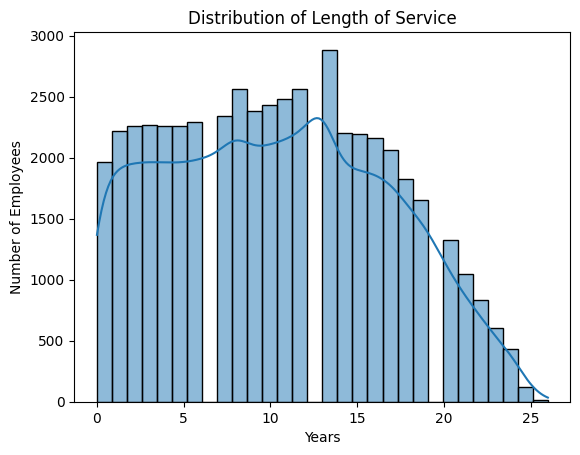

In [9]:
#Employee Tenure Analysis
#Exploration of the distribution associated with how long employees tend to stay within the company
# Visualizing the distribution of length of service
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['length_of_service'], bins=30, kde=True)
plt.title('Distribution of Length of Service')
plt.xlabel('Years')
plt.ylabel('Number of Employees')
plt.show()


In [10]:
#Demographic Analysis
#Analisis associated with the demographics of the workforce in order to understand the diversity associated within the company
# Employee count by gender and age group
pd.crosstab(df['gender_full'], pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61+']))


age,18-30,31-40,41-50,51-60,61+
gender_full,,,,,
Female,5642,5679,5831,5896,2850
Male,5819,5914,5832,5665,525


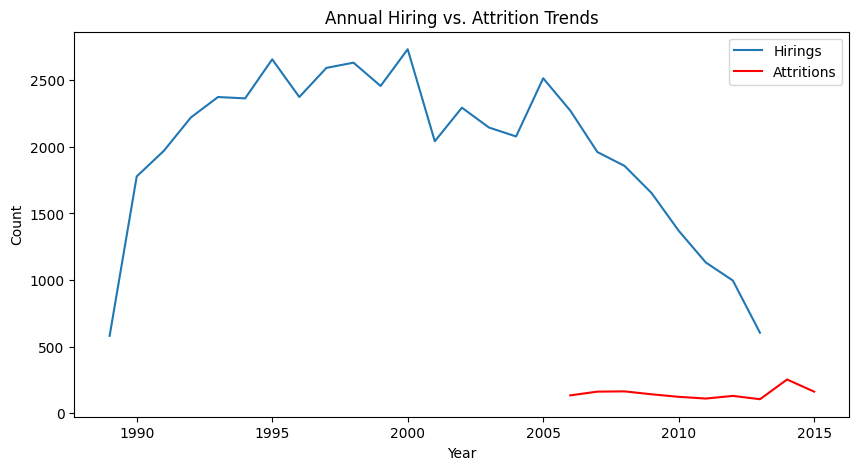

In [12]:
#Performance Trends Over Time
#Analyse how different metrics including employee count, turnover and average return have changed over time
# Annual trends in hiring and attrition conisdeing convertions related with time-date objects associated and strings to datetime format list
# Convert the 'orighiredate_key' and 'terminationdate_key' columns to datetime
df['orighiredate_key'] = pd.to_datetime(df['orighiredate_key'])
df['terminationdate_key'] = pd.to_datetime(df['terminationdate_key'], errors='coerce')  # Use coerce for NaN if date invalid

# Now you can perform the analysis
# Annual trends in hiring
annual_hiring = df['orighiredate_key'].dt.year.value_counts().sort_index()

# Annual trends in attrition
# Ensure you are selecting rows where the status indicates they are no longer employed
annual_attrition = df[df['STATUS'] != 'ACTIVE']['terminationdate_key'].dt.year.value_counts().sort_index()

# Plotting the trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(annual_hiring.index, annual_hiring.values, label='Hirings')
plt.plot(annual_attrition.index, annual_attrition.values, label='Attritions', color='red')
plt.title('Annual Hiring vs. Attrition Trends')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()



In [13]:
#Diversity and inclusion analysis
#Association related to the diversity in the workforce across different dimensinos such as gender, age, and job roles
#Identification of disparities in employment practices assocaited
# Gender diversity across departments
gender_diversity = pd.crosstab(df['department_name'], df['gender_full'])
print(gender_diversity)

# Age distribution across job titles
age_distribution = df.groupby('job_title')['age'].mean()
print(age_distribution)


gender_full             Female  Male
department_name                     
Accounting                  59     0
Accounts Payable            29     5
Accounts Receiveable        29    10
Audit                       10    14
Bakery                    4297  4084
Compensation                10    14
Customer Service          3536  3586
Dairy                     4148  4451
Employee Records            36     8
Executive                   50    50
HR Technology               54    10
Information Technology       0    20
Investment                  10    14
Labor Relations             18    16
Legal                        9     8
Meats                     5826  4443
Processed Foods           2857  3054
Produce                   4669  3846
Recruitment                 64     8
Store Management           169   102
Training                    18    12
job_title
Accounting Clerk                   60.500000
Accounts Payable Clerk             60.000000
Accounts Receiveable Clerk         59.666667
Audi

In [20]:
#Identify the name of the columns in order to generate the predictive model associated with the variable of interest
import pandas as pd
#print the associated column names
print(df.columns)


Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')


In [22]:
#Identification of the structure of the variables for predictive modelling identification
import pandas as pd
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [23]:
#Summary statistics of the numerical data previous to the model construction
# Show summary statistics for numerical variables
print(df.describe())

# For categorical variables, view a sample of unique values to understand their contents
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()[:5]}")  # Shows first 5 unique values


         EmployeeID           age  length_of_service    store_name  \
count  49653.000000  49653.000000       49653.000000  49653.000000   
mean    4859.495740     42.077035          10.434596     27.297605   
std     1826.571142     12.427257           6.325286     13.514134   
min     1318.000000     19.000000           0.000000      1.000000   
25%     3360.000000     31.000000           5.000000     16.000000   
50%     5031.000000     42.000000          10.000000     28.000000   
75%     6335.000000     53.000000          15.000000     42.000000   
max     8336.000000     65.000000          26.000000     46.000000   

        STATUS_YEAR   STATUS  
count  49653.000000  49653.0  
mean    2010.612612      0.0  
std        2.845577      0.0  
min     2006.000000      0.0  
25%     2008.000000      0.0  
50%     2011.000000      0.0  
75%     2013.000000      0.0  
max     2015.000000      0.0  
Unique values in recorddate_key: ['12/31/2006 0:00' '12/31/2007 0:00' '12/31/2008 0:00' '1

In [24]:
#Predictive Employee Turnover
#Identification of values of termreason_desc and termtype_desc to predict the employee termination
#Predict the employee termination associated to "Voluntary"
#Data preparation and preprocessing for data modeling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('/path/to/your/data.csv')

# Convert dates to datetime
df['recorddate_key'] = pd.to_datetime(df['recorddate_key'])
df['birthdate_key'] = pd.to_datetime(df['birthdate_key'])
df['orighiredate_key'] = pd.to_datetime(df['orighiredate_key'])
df['terminationdate_key'] = pd.to_datetime(df['terminationdate_key'])

# Calculate tenure in years
df['tenure'] = (df['terminationdate_key'] - df['orighiredate_key']).dt.days / 365.25

# Define the target variable for turnover based on 'termtype_desc'
df['is_voluntary_turnover'] = (df['termtype_desc'] == 'Voluntary').astype(int)

# Drop unnecessary columns
df = df.drop(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key', 'terminationdate_key', 'termtype_desc', 'termreason_desc', 'STATUS'], axis=1)

# Encoding categorical variables
categorical_columns = ['city_name', 'department_name', 'job_title', 'gender_short', 'gender_full', 'BUSINESS_UNIT']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the data into features and target
X = df.drop('is_voluntary_turnover', axis=1)
y = df['is_voluntary_turnover']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [25]:
#Use of random forest classifier considering the robustness and the availability of the data in order to handle unbalance data associated
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)


In [26]:
#Evaluation of the model accuracy and performance using accuracy and classification report
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.994461786325647
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9677
           1       0.93      0.84      0.89       254

    accuracy                           0.99      9931
   macro avg       0.97      0.92      0.94      9931
weighted avg       0.99      0.99      0.99      9931



In [27]:
#Considering the effectiveness of the model, implement some suggestions starting with SMOTE
#Use SMOTE in order to address the class imbalance to generate accurancy in the model associated
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on the balanced data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluate the model with cross-validation
scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

# Re-evaluate on the test set
predictions = model.predict(X_test)
print("Re-evaluated Accuracy:", accuracy_score(y_test, predictions))
print("Re-evaluated Classification Report:\n", classification_report(y_test, predictions))


Cross-validated scores: [0.99263709 0.99780404 0.99735176 0.99748095 0.99832063]
Average score: 0.9967188936684022
Re-evaluated Accuracy: 0.9940590071493304
Re-evaluated Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9677
           1       0.88      0.89      0.88       254

    accuracy                           0.99      9931
   macro avg       0.94      0.94      0.94      9931
weighted avg       0.99      0.99      0.99      9931



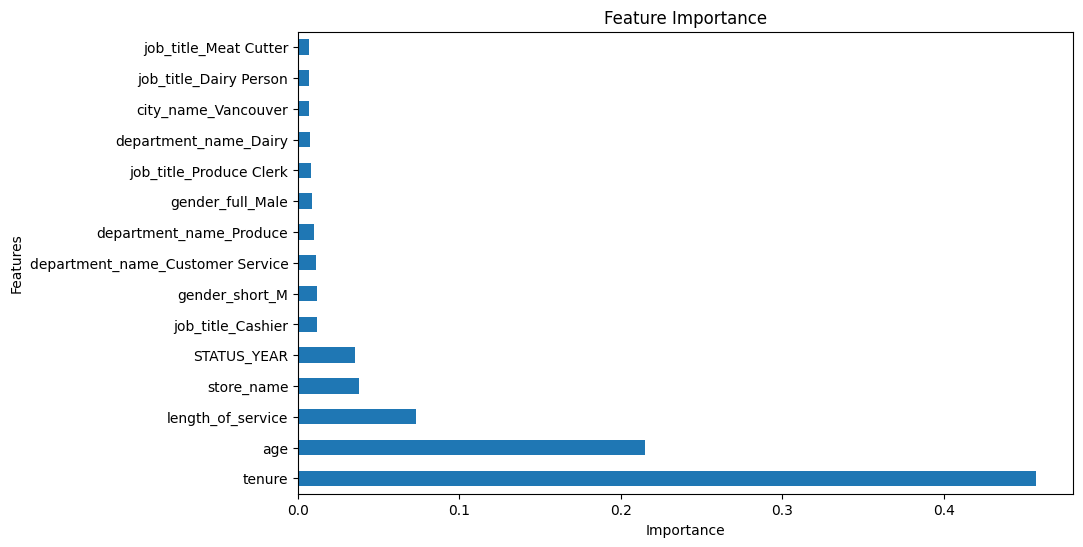

In [30]:
#Feature Importance Plot: Creation of a plot in order to show the importance of each feature in predicting employee turnover
#Identify which factors contribute the most to turnover predictions
# Plot feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


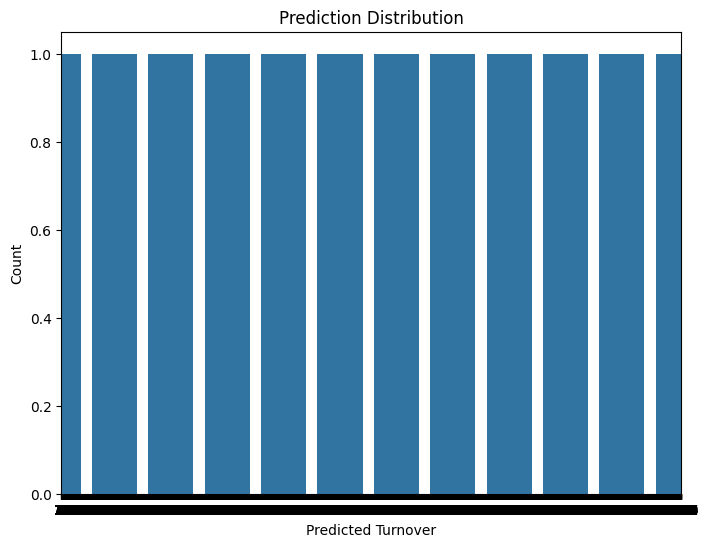

In [31]:
#Prediction Distribution
#Creation of a histogram that shows the distribution of predicted turnover (0,1) in the test set.
#Presentation of an overview of how many employees are predicted to turn out voluntarily
# Plot prediction distribution
plt.figure(figsize=(8, 6))
sns.countplot(predictions)
plt.title('Prediction Distribution')
plt.xlabel('Predicted Turnover')
plt.ylabel('Count')
plt.show()


<ipython-input-38-09ac0dd926a3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='predicted_probability', y='BUSINESS_UNIT_STORES', data=business_unit_turnover, palette='Set2')


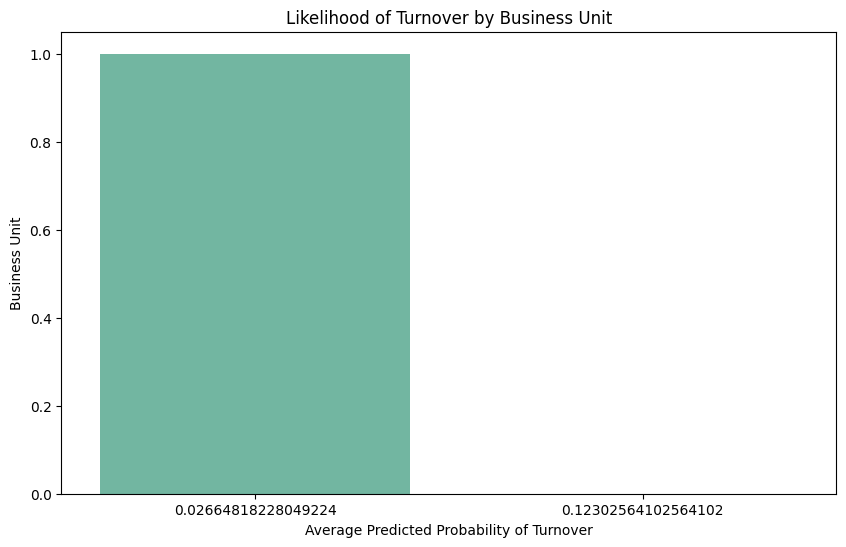

In [38]:
#Predicted turnover by business unit analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe containing employee data with business unit information

# Step 1: Prepare Data
# Assuming you have a dataframe 'df' with columns 'BUSINESS_UNIT_STORES' and other necessary features

# Step 2: Predict Turnover Probabilities
# Use your trained model to predict the probability of turnover for each employee
# Replace 'model' with the name of your trained model
predictions = model.predict_proba(df.drop(['is_voluntary_turnover', 'predicted_probability'], axis=1))[:, 1]
df['predicted_probability'] = predictions

# Step 3: Aggregate Results
# Calculate the average predicted probability of turnover for each business unit
business_unit_turnover = df.groupby('BUSINESS_UNIT_STORES')['predicted_probability'].mean().reset_index()

# Step 4: Visualize Results
plt.figure(figsize=(10, 6))
sns.barplot(x='predicted_probability', y='BUSINESS_UNIT_STORES', data=business_unit_turnover, palette='Set2')
plt.title('Likelihood of Turnover by Business Unit')
plt.xlabel('Average Predicted Probability of Turnover')
plt.ylabel('Business Unit')
plt.show()




In [39]:
#Identify the current variables
print(df.columns)


Index(['age', 'length_of_service', 'store_name', 'STATUS_YEAR', 'tenure',
       'is_voluntary_turnover', 'city_name_Aldergrove',
       'city_name_Bella Bella', 'city_name_Blue River', 'city_name_Burnaby',
       ...
       'job_title_Store Manager', 'job_title_Systems Analyst',
       'job_title_Trainer', 'job_title_VP Finance',
       'job_title_VP Human Resources', 'job_title_VP Stores', 'gender_short_M',
       'gender_full_Male', 'BUSINESS_UNIT_STORES', 'predicted_probability'],
      dtype='object', length=115)


<ipython-input-41-a1241b0ba9b4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='predicted_probability', data=age_group_turnover, palette='Set2')


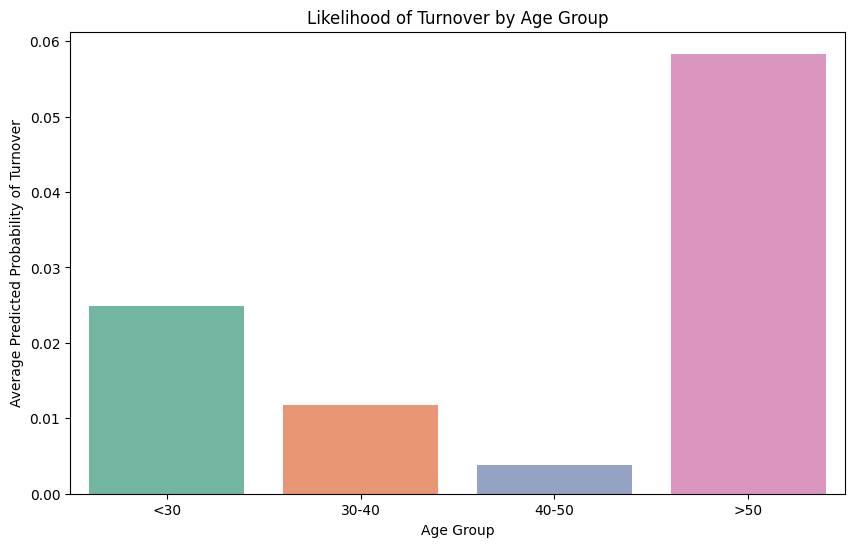

In [41]:
#Likelyhood associated with Turnover considering the specific Age Group
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe containing employee data with age information

# Step 1: Create Age Groups
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '>50']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Step 2: Prepare Data
# Assuming you have a dataframe 'df' with columns 'age_group' and other necessary features

# Step 3: Predict Turnover Probabilities
# Use your trained model to predict the probability of turnover for each employee
# Replace 'model' with the name of your trained model
predictions = model.predict_proba(df.drop(['is_voluntary_turnover', 'predicted_probability', 'age_group'], axis=1))[:, 1]
df['predicted_probability'] = predictions

# Step 4: Aggregate Results
# Calculate the average predicted probability of turnover for each age group
age_group_turnover = df.groupby('age_group')['predicted_probability'].mean().reset_index()

# Step 5: Visualize Results
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='predicted_probability', data=age_group_turnover, palette='Set2')
plt.title('Likelihood of Turnover by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Predicted Probability of Turnover')
plt.show()



In [45]:
print(df.columns)


Index(['age', 'length_of_service', 'store_name', 'STATUS_YEAR', 'tenure',
       'is_voluntary_turnover', 'city_name_Aldergrove',
       'city_name_Bella Bella', 'city_name_Blue River', 'city_name_Burnaby',
       ...
       'job_title_Systems Analyst', 'job_title_Trainer',
       'job_title_VP Finance', 'job_title_VP Human Resources',
       'job_title_VP Stores', 'gender_short_M', 'gender_full_Male',
       'BUSINESS_UNIT_STORES', 'predicted_probability', 'age_group'],
      dtype='object', length=116)


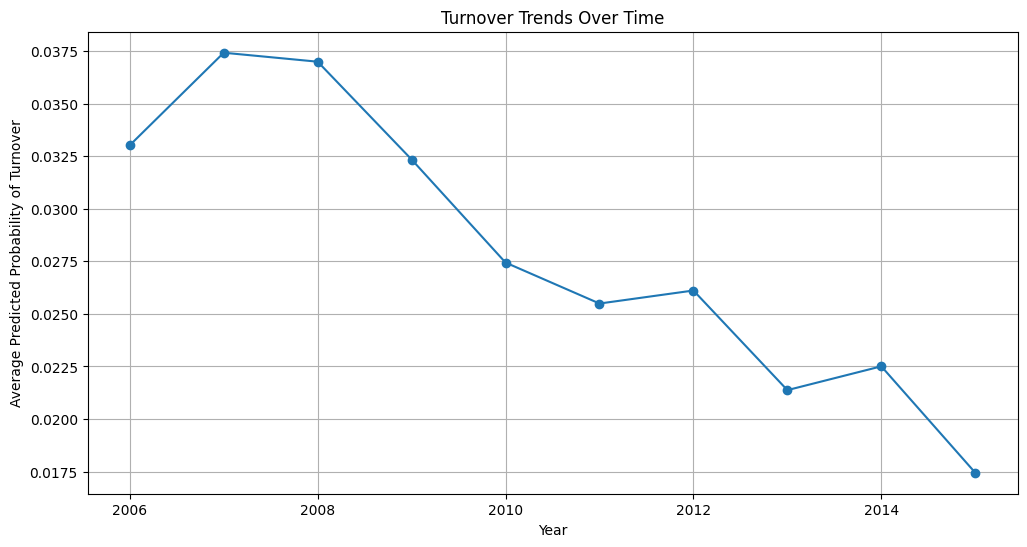

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing employee data with time component ('STATUS_YEAR')

# Step 1: Prepare Data
# Assuming you have a dataframe 'df' with columns 'STATUS_YEAR', 'is_voluntary_turnover', and other necessary features

# Step 2: Predict Turnover Probabilities
# Use your trained model to predict the probability of turnover for each time point
# Replace 'model' with the name of your trained model
predictions = model.predict_proba(df.drop(['is_voluntary_turnover', 'predicted_probability', 'age_group'], axis=1))[:, 1]
df['predicted_probability'] = predictions

# Step 3: Aggregate Results
# Calculate the average predicted probability of turnover for each time point
turnover_trends = df.groupby('STATUS_YEAR')['predicted_probability'].mean().reset_index()

# Step 4: Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(turnover_trends['STATUS_YEAR'], turnover_trends['predicted_probability'], marker='o', linestyle='-')
plt.title('Turnover Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Predicted Probability of Turnover')
plt.grid(True)
plt.show()

